# Graduate Admission

### Hi I have been working in Machine Learning from past one year. This is my first project working with Text Data. I have been working with Image Data more

### Idea behind this project is to create a model and deploy on Heroku, which will help you get idea how machine learning product can be used End-To-End.

### Dataset Link and details: https://www.kaggle.com/mohansacharya/graduate-admissions

### In this notebook, you will get basic idea of what are the steps for developing Machine Learning Model

### Feel free to reach out to me: 
- Email- satish.fulwani63@gmail.com
- Github - https://github.com/satishf889

### Below are the useful links that will help you understand Heatmap used in this notebook
  - https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410
  
### Update to Notebook:
- As initially we were doing normalization, Linear Regressor Algorithm was predicting value which were out of range.
- So I removed normaliztion and appliead various tests on our features matrix
- In this notebook I have used Pearson Correlation, Spearman Correation and Chi-Table

### Import All Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import pearsonr,spearmanr
from scipy.stats import chi2_contingency
import pickle
import sys

### Load the dataset

In [2]:
graduation_data=pd.read_csv("data/Admission_Predict_Ver1.1.csv")
graduation_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Understanding and visualising data

In [3]:
#Getting all the information of our dataset
graduation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
#We will find out mean,max,count of all the columns in our dataframe
graduation_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### As we can see Serial number is independent column so we will remove Serial Number

In [5]:
#Removing 'Serial No. column from our data'
graduation_data.drop(['Serial No.'],axis=1,inplace=True)

#Now we will be declare features and output
feature_X=graduation_data.drop(['Chance of Admit '],axis=1)
feature_Y=graduation_data['Chance of Admit ']
# feature_Y.head(10)

In [6]:
feature_X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


### Visualizing Data

- Generating Pairplot to find out the dependency of each feature matrix

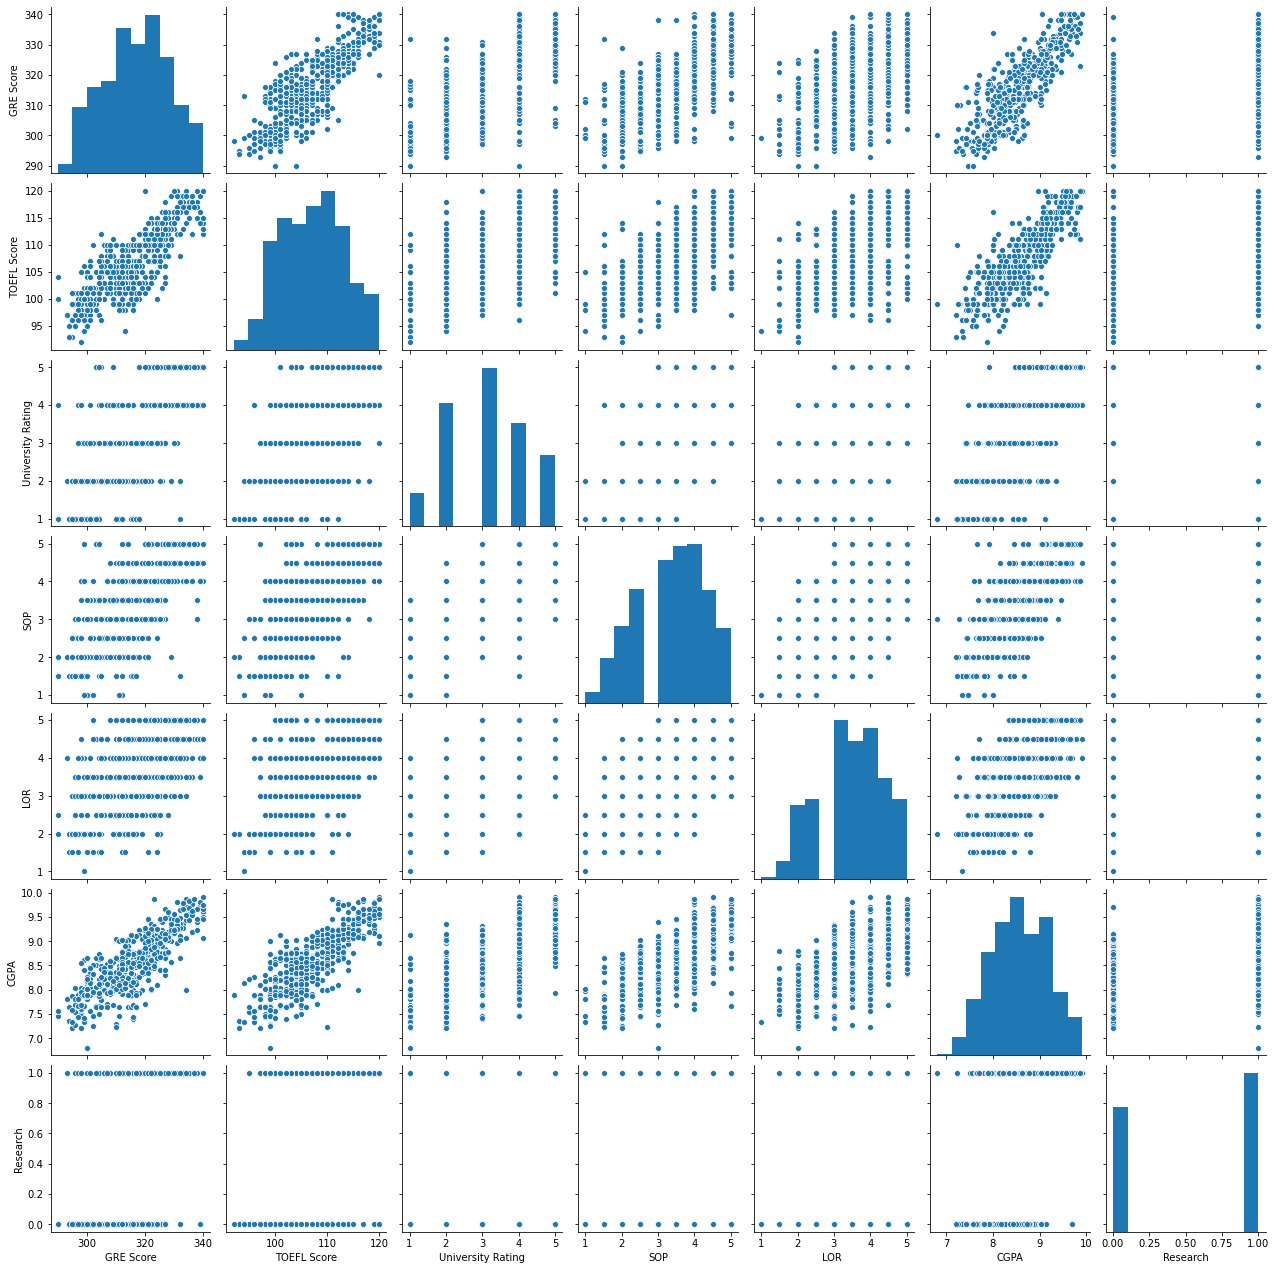

In [7]:
# ppfig,ppax=plt.subplots(figsize=(14, 14))
xpairplot=sns.pairplot(feature_X)

### Saving Pairplot in file

In [8]:
xpairplot.savefig("output_images/pairplot")

### Now calculate pearson correlation to find out the Dependency of remaining features

> Pearson correltion works as below:
 -  P=1 means features are Strongly positively correlated
 -  P=0 means there is not linearly correlation
 -  P=-1 means features are strongly negatively correlated
 
 In our data, features are nearly eqaul to 0.5 . Means features are not linearly correlated

In [9]:
GRE_score=feature_X['GRE Score']
TOEFL_score=feature_X['TOEFL Score']
uni_rating=feature_X['University Rating']
sop=feature_X['SOP']
lor=feature_X['LOR ']
cgpa=feature_X['CGPA']
research=feature_X['Research']


pearsonr_coefficient,p_value=pearsonr(GRE_score,uni_rating)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')
pearsonr_coefficient,p_value=pearsonr(GRE_score,sop)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')
pearsonr_coefficient,p_value=pearsonr(GRE_score,lor)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')
pearsonr_coefficient,p_value=pearsonr(GRE_score,research)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')
pearsonr_coefficient,p_value=pearsonr(GRE_score,TOEFL_score)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')
pearsonr_coefficient,p_value=pearsonr(GRE_score,cgpa)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient:0.3f}')

PearsonR Correlation Coefficient 0.635
PearsonR Correlation Coefficient 0.613
PearsonR Correlation Coefficient 0.525
PearsonR Correlation Coefficient 0.563
PearsonR Correlation Coefficient 0.827
PearsonR Correlation Coefficient 0.826


#### From above analysis we found out that GRE_SCORE,TOEFL,CGPA are more correlated than others
### We can find out correlation by just single step below

In [10]:
correlation=feature_X.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


#### Generating SNS Heatmap to find out correlated features

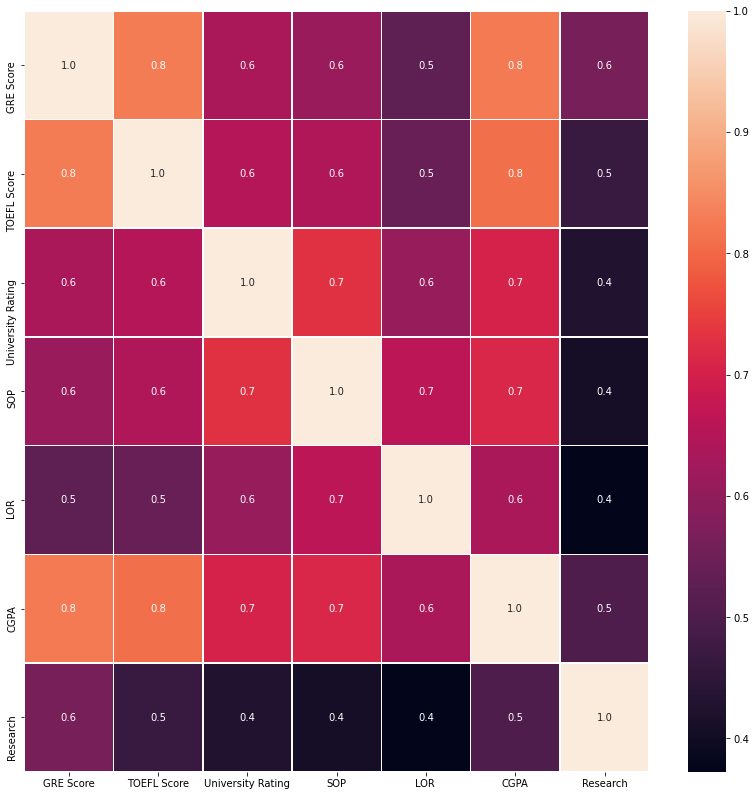

In [11]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Saving Heatmap to file

In [12]:
f.savefig("output_images/heatmap")

#### As from the above heatmap we can see that correlation coefficient of GRE Score, TOEFL Score and CGPA is same so we can keep one feature and remove other two

In [13]:
feature_X.drop(['TOEFL Score','CGPA'],axis=1,inplace=True)

### Now we would work on our categorical data:
- We would find Spearman Correlation
- CHI-Square Table

In [14]:
spearmanr_coefficient,p_value= spearmanr(GRE_score,uni_rating)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')
spearmanr_coefficient,p_value= spearmanr(GRE_score,sop)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')
spearmanr_coefficient,p_value= spearmanr(GRE_score,lor)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')
spearmanr_coefficient,p_value= spearmanr(GRE_score,research)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient 0.643
Spearman Rank correlation coefficient 0.621
Spearman Rank correlation coefficient 0.514
Spearman Rank correlation coefficient 0.578


#### Now we will find p using chi-square table

In [15]:
table=pd.crosstab(GRE_score,uni_rating)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

table=pd.crosstab(GRE_score,sop)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

table=pd.crosstab(GRE_score,lor)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

table=pd.crosstab(GRE_score,research)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 466.467 p_value0.000
Chi-square statistic 652.315 p_value0.000
Chi-square statistic 490.931 p_value0.000
Chi-square statistic 221.104 p_value0.000


##### So as CHI_Square gave probabiltiy of 0 so null hypothesis that features are independent is wrong 

### Now our data is ready to be processed 

In [16]:
x=feature_X
y=feature_Y

### Spliting the data in Train and Test Set

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,shuffle='false')

### Creating Models
#### We will be creating various models and will be using 'Mean Square Error' as measure of Accuracy

### Using Linear Regressor

In [18]:
model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)

train_prediction=model_LR.predict(X_train)
prediction=model_LR.predict(X_test)
# print(model_LR.predict([[337,4,3.5,3,1]]))
print(f"Mean Square Error using Linear Regressor on training data is {(np.sqrt(mean_squared_error(Y_train, train_prediction)))}")
print(f"Mean Square Error using Linear Regressor is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Linear Regressor on training data is 0.06935557005010248
Mean Square Error using Linear Regressor is 0.07537972150110725


### Using DecisionTree

In [19]:
from sklearn.tree import DecisionTreeRegressor

model_DT=DecisionTreeRegressor()
model_DT.fit(X_train,Y_train)
# print(model_DT.predict([[337,4,3.5,3,1]]))
train_prediction=model_DT.predict(X_train)
prediction=model_DT.predict(X_test)
print(f"Mean Square Error using Decison Tree on training data is {(np.sqrt(mean_squared_error(Y_train, train_prediction)))}")
print(f"Mean Square Error using Decison Tree is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Decison Tree on training data is 0.01294378872921938
Mean Square Error using Decison Tree is 0.09531657778162203


### Using RandomForestRegressor

In [20]:
model_RF=RandomForestRegressor()
model_RF.fit(X_train,Y_train)

train_prediction=model_RF.predict(X_train)
prediction=model_RF.predict(X_test)
print(f"Mean Square Error using RandomForestRegressor on training data is {(np.sqrt(mean_squared_error(Y_train, train_prediction)))}")
print(f"Mean Square Error using RandomForestRegressor is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using RandomForestRegressor on training data is 0.03025862023639082
Mean Square Error using RandomForestRegressor is 0.07982426044517793


### Using Kneighbors

In [21]:
model_KN=KNeighborsRegressor()
model_KN.fit(X_train,Y_train)

train_prediction=model_KN.predict(X_train)
prediction=model_KN.predict(X_test)
print(f"Mean Square Error using Kneighbors on training data is {(np.sqrt(mean_squared_error(Y_train, train_prediction)))}")
print(f"Mean Square Error using Kneighbors is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Kneighbors on training data is 0.06003932044918563
Mean Square Error using Kneighbors is 0.08139926289592553


### Using SVR

In [22]:
model_SVR=SVR()
model_SVR.fit(X_train,Y_train)
train_prediction=model_KN.predict(X_train)
prediction=model_SVR.predict(X_test)
print(f"Mean Square Error using Kneighbors on training data is {(np.sqrt(mean_squared_error(Y_train, train_prediction)))}")
print(f"Mean Square Error using SVR is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Kneighbors on training data is 0.06003932044918563
Mean Square Error using SVR is 0.08671014975290485


### Step 6:Conclusion
#### Model with minimum 'Mean Square Error' is best fit for our data. So we would be using Linear Regresser with 0.07 Error

### We have to use this model for prediction, so we would store our model using pickle.

#### Pickle Details: https://docs.python.org/3/library/pickle.html

In [23]:
sys.path.append('.')

filename='admission_model.pkl'
pickle.dump(model_LR, open("../Model/"+filename, 'wb'))
print("Model Pickled and saved to Model Directory.")

Model Pickled and saved to Model Directory.
